In [1]:
## Poisson Equation
## Load Packages
# Load FEniCS
from dolfin import *
# Plotting Libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as trans
import matplotlib.gridspec as gridspec

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(24, 24)
V = FunctionSpace(mesh, 'P', 1)

In [3]:
# Define classes for the boundaries
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0.0)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 1.0)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0.0)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 1.0)

# Initialize sub-domain instances
left = Left()
right = Right()
bottom = Bottom()
top = Top()

# Define values for the boundary conditions
bc_left = DirichletBC(V, Constant(0.25), left)
bc_right = DirichletBC(V, Constant(0.25), right)
bc_bottom = DirichletBC(V, Constant(0.0), bottom)
bc_top = DirichletBC(V, Constant(0.25), top)

# Collect boundary conditions
bc = [bc_left, bc_right, bc_bottom, bc_top]

In [4]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("1", degree=0)
a = dot(grad(u), grad(v)) * dx
# a = inner(grad(u), grad(v)) * dx
L = f*v*dx

# Compute solution
w = Function(V)
solve(a == L, w, bc)


Solving linear variational problem.


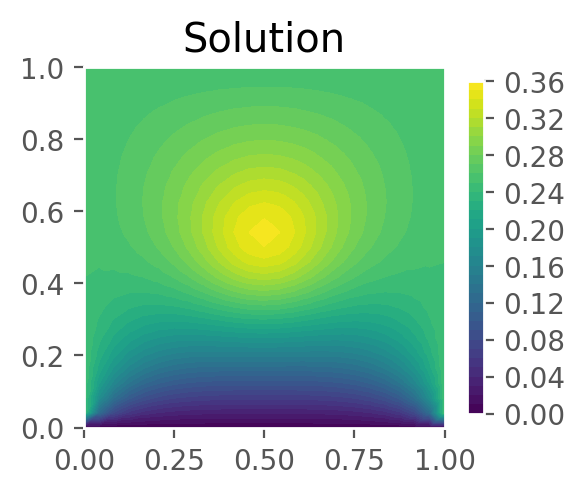

In [5]:
## Plotting the solution.
plt.figure(dpi=200)                       # Set the resolution
plt.style.use('ggplot')                   # Use the ggplot style
plt.subplot(122)
plot(w, title = 'Solution')              # Set the title
plt.colorbar(plot(w, title="Solution"), shrink=0.45)#plt.savefig('Poisson_Mesh_and_Sol.png',dpi=200) # Savefig
plt.show()